<a href="https://colab.research.google.com/github/yamica0603/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# prompt: Write a code to upload csv file from drive

from google.colab import drive
drive.mount('/content/drive')

# Get the path to the CSV file on Drive
csv_path = '/content/drive/My Drive/Churn_Modelling.csv'

# Read the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv(csv_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
# prompt: check for missing or invalid data and show it

# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

# Check for invalid data in the 'Gender' column
invalid_data = df['Gender'].value_counts()

# Print the number of invalid values in the 'Gender' column
print(invalid_data)

print(df.describe())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max   

In [108]:
!pip install pyspark
import pandas as pd

In [124]:
import pyspark
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler,StandardScaler,PCA
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,when,mean,avg,max
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import DataFrame
from pyspark.ml.feature import Imputer
import pandas as pd
from pyspark.sql.functions import col
import pyspark
pyspark.SparkContext.getOrCreate()

<SparkContext master=local[*] appName=pyspark-shell>

In [110]:


# Create a new column called 'target' that is equal to the value of the 'Exited' column
df['target'] = df['Exited']

#Removing the unwanted columns
df.drop(["CustomerId","Surname"],inplace=True,axis=1)


In [111]:
df.drop(["RowNumber"], inplace=True, axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  target           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [112]:
# Get the data types of each column in the DataFrame
dtypes = df.dtypes

# Find the column with non-numeric values
non_numeric_column = dtypes[dtypes != 'float64'].index[0]

print(f"Non-numeric column: {non_numeric_column}")

Non-numeric column: CreditScore


In [113]:
# Remove the non-numeric column from the DataFrame
df = df.drop(columns=[non_numeric_column])

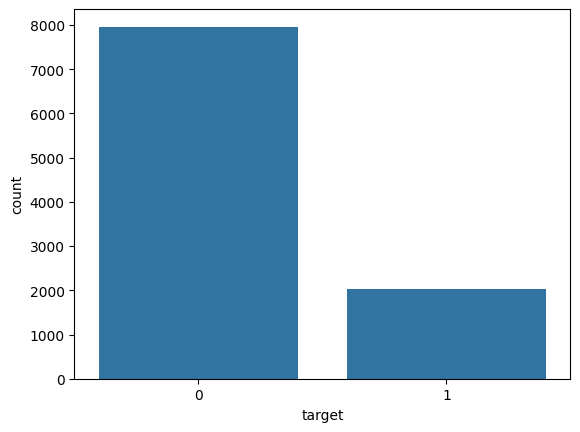

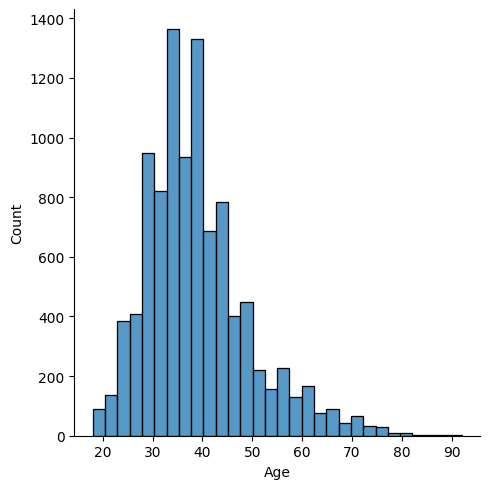

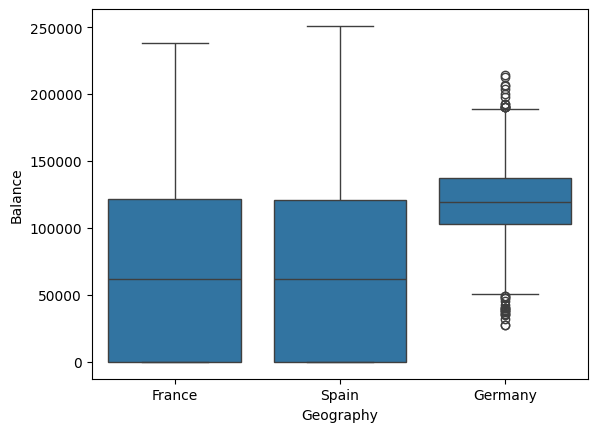

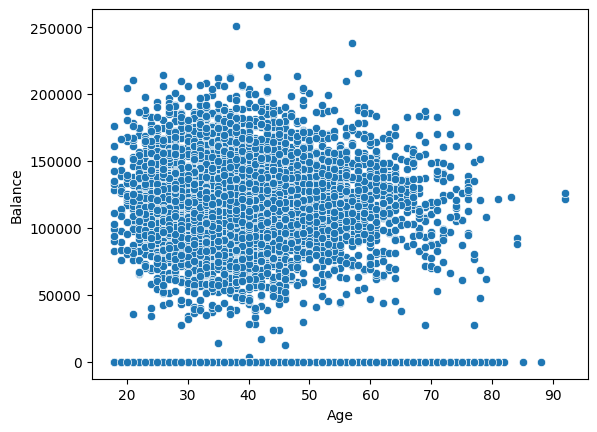

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart of the target variable
sns.countplot(x='target', data=df)
plt.show()

# Create a histogram of the age variable
sns.displot(df['Age'], kde=False, bins=30)
plt.show()

# Create a boxplot of the balance variable
sns.boxplot(x='Geography', y='Balance', data=df)
plt.show()

# Create a scatterplot of the age and balance variables
sns.scatterplot(x='Age', y='Balance', data=df)
plt.show()





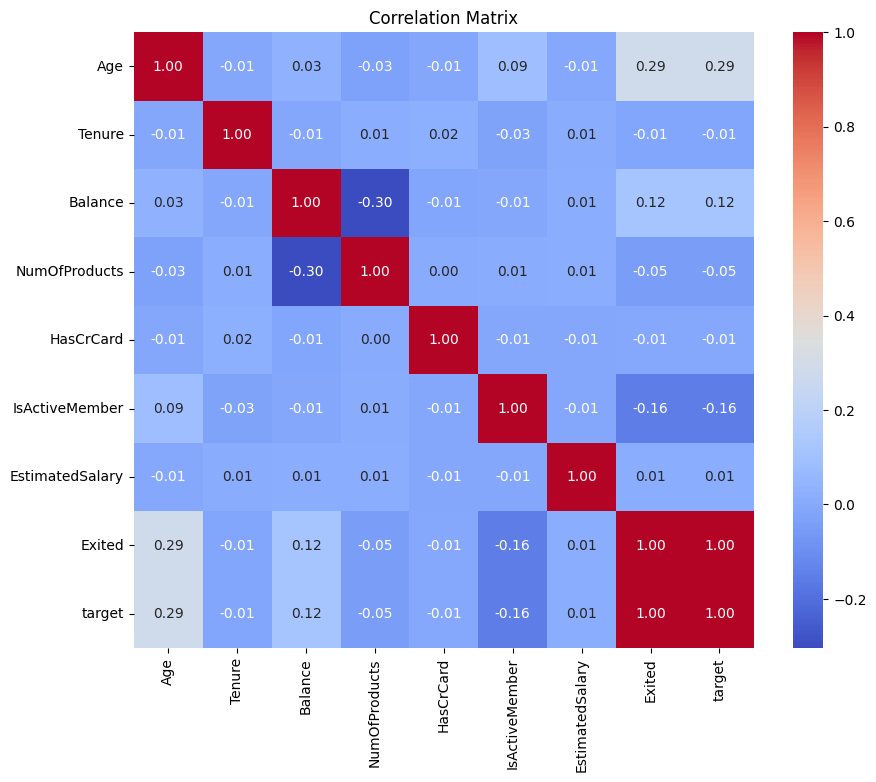

In [115]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing both numerical and non-numerical columns

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Filter the DataFrame to include only numerical columns
df_numerical = df[numerical_columns]

# Convert non-numeric values to NaN
df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix of the numerical variables
correlation_matrix = df_numerical.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [116]:
X=df.drop(["Exited"],axis=1)
y=df.Exited

In [131]:
df.isnull().any()

Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
target             False
dtype: bool

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [176]:
#Drop the non-numeric column from the X DataFrame:
non_numeric_column = 'Geography'
X = X.drop(columns=[non_numeric_column])

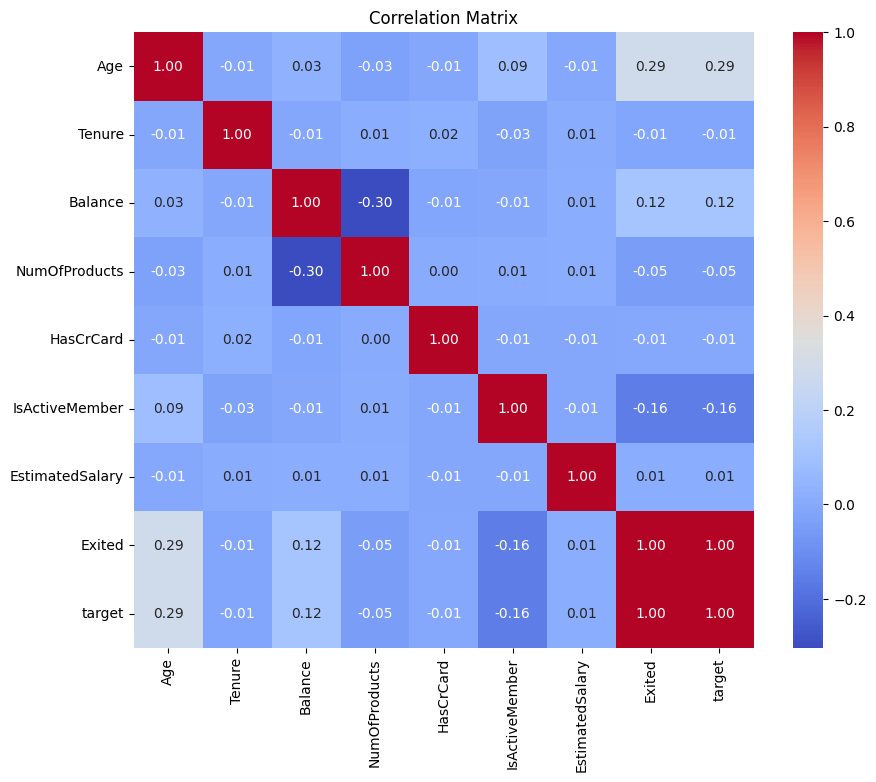

In [118]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'df' is your DataFrame containing both numerical and non-numerical columns

# Check if 'Geography' column exists in the DataFrame
if 'Geography' in df.columns:
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Filter the DataFrame to include only numerical columns
    df_numerical = df[numerical_columns]

    # Convert non-numeric values to NaN
    df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce')

    # Create a correlation matrix of the numerical variables
    correlation_matrix = df_numerical.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Column 'Geography' not found in the DataFrame.")

In [134]:
df.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,0,0,42,2,0.00,1,1,1,101348.88,1,1
1,2,0,41,1,83807.86,1,0,1,112542.58,0,0
2,0,0,42,8,159660.80,3,1,0,113931.57,1,1
3,0,0,39,1,0.00,2,0,0,93826.63,0,0
4,2,0,43,2,125510.82,1,1,1,79084.10,0,0


In [151]:
x = df.iloc[:,3:13]
y = df.iloc[:, 10]

x = df.iloc[:,3:13].values
y =  df.iloc[:,10] .values



In [152]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,1:2]).toarray()
x = np.delete(x,1,axis = 1)
x = np.concatenate((z,x),axis = 1)

In [153]:
x.shape

(10000, 6389)

In [154]:
x  = x[:,1:]

In [150]:
x.shape

(10000, 6388)

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [156]:
x_train.shape

(8000, 6388)

In [158]:
y_train.shape

(8000,)

In [163]:
x_test.shape


(2000, 6388)

In [164]:
y_test.shape

(2000,)

In [165]:
x_train

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6383064e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.7098000e+04,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.8563076e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.8142987e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4875016e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1885526e+05,
        1.0000000e+00, 1.0000000e+00]])

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [167]:
#importing the model & layer
import keras
from keras.models import Sequential
from keras.layers import Dense

In [168]:
classifer = Sequential()

In [169]:
classifer.add(Dense(units = 11,kernel_initializer = 'uniform', activation = 'relu'))

classifer.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifer.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))

classifer.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifer.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

classifer.fit(x_train,y_train, batch_size = 16, epochs = 200)



Epoch 1/200
500/500 [==============================] - 9s 12ms/step - loss: 0.6361 - accuracy: 0.7952
Epoch 2/200
500/500 [==============================] - 3s 5ms/step - loss: 0.5626 - accuracy: 0.7960
Epoch 3/200
500/500 [==============================] - 2s 3ms/step - loss: 0.5282 - accuracy: 0.7960
Epoch 4/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5139 - accuracy: 0.7960
Epoch 5/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5085 - accuracy: 0.7960
Epoch 6/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5066 - accuracy: 0.7960
Epoch 7/200
500/500 [==============================] - 2s 3ms/step - loss: 0.5061 - accuracy: 0.7960
Epoch 8/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 9/200
500/500 [==============================] - 2s 5ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 10/200
500/500 [==============================] - 1s 3ms/step - loss: 0.5059 - accur

In [170]:
y_pred = classifer.predict(x_test)

y_pred = (y_pred>0.5)

y_pred[60]



63/63 [==============================] - 0s 2ms/step


array([False])

In [171]:
y_test[60]

0

In [181]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred , y_test)

from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test,y_pred)

In [182]:
acc

0.7975

In [183]:
cm

array([[1595,    0],
       [ 405,    0]])

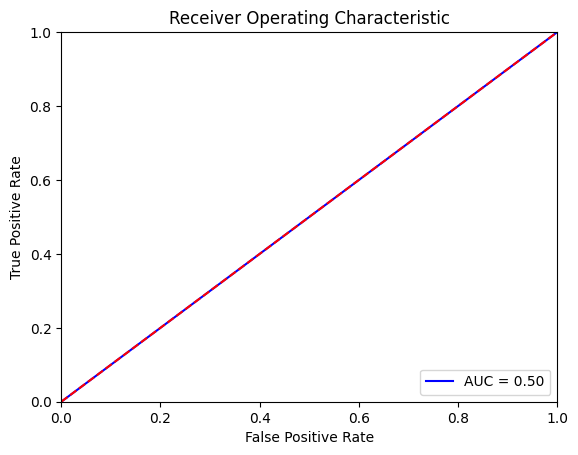

In [175]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()